<a href="https://colab.research.google.com/github/asdfasdf0311/kaggle-1/blob/main/data_visualization2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#데이터 경로 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#데이터로드
train = pd.read_csv('/content/drive/MyDrive/ydms/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ydms/titanic/test.csv')
survived = pd.read_csv('/content/drive/MyDrive/ydms/titanic/gender_submission.csv')

In [ ]:
# DataFrame 생성
faketrain = train

faketrain['Age'] = (faketrain['Age'] // 10) * 10
faketrain = faketrain.dropna(subset=['Age'])
faketrain['Age'] = faketrain['Age'].astype(int)

<ipython-input-37-38251ac3b1c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faketrain['Age'] = faketrain['Age'].astype(int)


age변수 -> int형으로 변환하고 10살 단위로 나눔

(10단위로 변환 전 후 값분포는 거의 동일)

ex) 23세 -> 20세, 45세 -> 40세

전처리 전에, 변수별 생존율만 확인하고 싶으므로 age변수결측치는 일단 제거하고 연관성만 봄

In [ ]:
cnt = faketrain['Age'].value_counts()
pd.DataFrame(cnt)

,Age
20,220
30,167
10,102
40,89
0,62
50,48
60,19
70,6
80,1


나이대별 생존율

In [ ]:
def myfn(data, groupby_col, target_col):

    # 정규화된 ex)생존율 계산
    survival_ratio = data.groupby(groupby_col)[target_col].value_counts(normalize=True).unstack()

    # 그래프 그리기
    ax = survival_ratio.plot(kind='bar', stacked=True)

    # 각 막대 위에 퍼센트 값 추가
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        percentage = height * 100
        ax.text(x + width / 2, y + height / 2, f'{percentage:.1f}%', ha='center', va='center')

    # 그래프 설정
    plt.xlabel(groupby_col)
    plt.ylabel(target_col)
    plt.title(f'Survival Ratio by {groupby_col}')

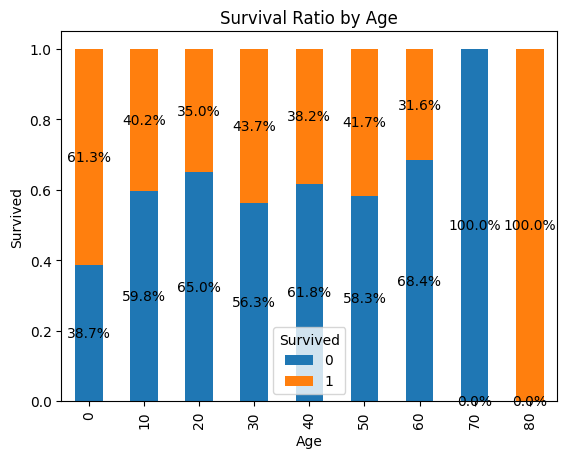

In [ ]:
myfn(faketrain, 'Age', 'Survived')

성별기준 나이대별 생존율(남,녀 따로)

In [ ]:
#남,녀 변수생성
faketrain_male = faketrain[faketrain['Sex']=='male']
faketrain_female = faketrain[faketrain['Sex']=='female']

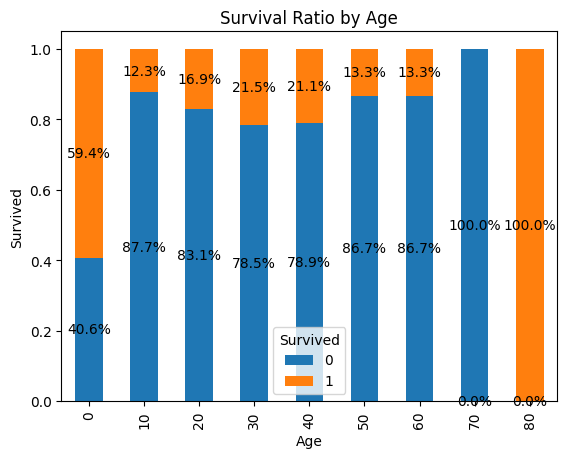

In [ ]:
myfn(faketrain_male,'Age','Survived')

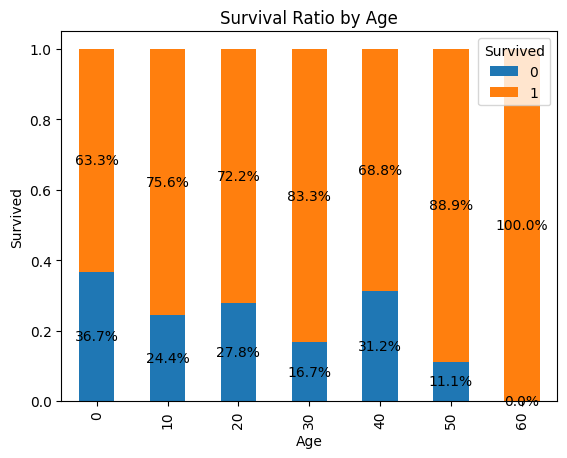

In [ ]:
myfn(faketrain_female,'Age','Survived')

여자는 70,80대가 없다.

In [ ]:
# DataFrame 생성
faketrain2 = train

faketrain2 = faketrain2.dropna(subset=['Age'])

Pclass, Survived, Sex 변수기준으로 총 12개 범주로 나누어서 age 변수 전처리에 사용할 그에맞는 평균값 구하기

In [ ]:
#남자, 1등석, 생존
subset1 = faketrain2[(faketrain2['Sex'] == "male") & (faketrain2['Pclass'] == 1) & (faketrain2['Survived'] == 1)]
#남자, 1등석, 사망
subset2 = faketrain2[(faketrain2['Sex'] == "male") & (faketrain2['Pclass'] == 1) & (faketrain2['Survived'] == 0)]
#남자, 2등석, 생존
subset3 = faketrain2[(faketrain2['Sex'] == "male") & (faketrain2['Pclass'] == 2) & (faketrain2['Survived'] == 1)]
#남자, 2등석, 사망
subset4 = faketrain2[(faketrain2['Sex'] == "male") & (faketrain2['Pclass'] == 2) & (faketrain2['Survived'] == 0)]
#남자, 3등석, 생존
subset5 = faketrain2[(faketrain2['Sex'] == "male") & (faketrain2['Pclass'] == 3) & (faketrain2['Survived'] == 1)]
#남자, 3등석, 사망
subset6 = faketrain2[(faketrain2['Sex'] == "male") & (faketrain2['Pclass'] == 3) & (faketrain2['Survived'] == 0)]
#여자, 1등석, 생존
subset11 = faketrain2[(faketrain2['Sex'] == "female") & (faketrain2['Pclass'] == 1) & (faketrain2['Survived'] == 1)]
#여자, 1등석, 사망
subset22 = faketrain2[(faketrain2['Sex'] == "female") & (faketrain2['Pclass'] == 1) & (faketrain2['Survived'] == 0)]
#여자, 2등석, 생존
subset33 = faketrain2[(faketrain2['Sex'] == "female") & (faketrain2['Pclass'] == 2) & (faketrain2['Survived'] == 1)]
#여자, 2등석, 사망
subset44 = faketrain2[(faketrain2['Sex'] == "female") & (faketrain2['Pclass'] == 2) & (faketrain2['Survived'] == 0)]
#여자, 3등석, 생존
subset55 = faketrain2[(faketrain2['Sex'] == "female") & (faketrain2['Pclass'] == 3) & (faketrain2['Survived'] == 1)]
#여자, 3등석, 사망
subset66 = faketrain2[(faketrain2['Sex'] == "female") & (faketrain2['Pclass'] == 3) & (faketrain2['Survived'] == 0)]

In [ ]:
data = {
    'Type': [],
    'Age_mean': [],
}
df = pd.DataFrame(data)

In [ ]:
new_row = pd.Series(['남자, 1등석, 생존', subset1['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)
new_row = pd.Series(['남자, 1등석, 사망', subset2['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)
new_row = pd.Series(['남자, 2등석, 생존', subset3['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)
new_row = pd.Series(['남자, 2등석, 사망', subset4['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)
new_row = pd.Series(['남자, 3등석, 생존', subset5['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)
new_row = pd.Series(['남자, 3등석, 사망', subset6['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)
new_row = pd.Series(['여자, 1등석, 생존', subset11['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)
new_row = pd.Series(['여자, 1등석, 사망', subset22['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)
new_row = pd.Series(['여자, 2등석, 생존', subset33['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)
new_row = pd.Series(['여자, 2등석, 사망', subset44['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)
new_row = pd.Series(['여자, 3등석, 생존', subset55['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)
new_row = pd.Series(['여자, 3등석, 사망', subset66['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)

<ipython-input-87-650ef58e8ced>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_row = pd.Series(['남자, 1등석, 생존', subset1['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)
<ipython-input-87-650ef58e8ced>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_row = pd.Series(['남자, 1등석, 사망', subset2['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)
<ipython-input-87-650ef58e8ced>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_row = pd.Series(['남자, 2등석, 생존', subset3['Age'].mean()], index=['Type', 'Age_mean']);df = df.append(new_row, ignore_index=True)
<ipython-input-87-650ef58e8ced>:4: FutureWarning: The frame.append method is deprecated and will 

In [ ]:
df

,Type,Age_mean
0,"남자, 1등석, 생존",31.500000
1,"남자, 1등석, 사망",40.000000
2,"남자, 2등석, 생존",13.333333
3,"남자, 2등석, 사망",28.690476
4,"남자, 3등석, 생존",17.894737
5,"남자, 3등석, 사망",22.930233
6,"여자, 1등석, 생존",30.365854
7,"여자, 1등석, 사망",23.333333
8,"여자, 2등석, 생존",23.676471
9,"여자, 2등석, 사망",30.000000


In [ ]:
round(df,1)

,Type,Age_mean
0,"남자, 1등석, 생존",31.5
1,"남자, 1등석, 사망",40.0
2,"남자, 2등석, 생존",13.3
3,"남자, 2등석, 사망",28.7
4,"남자, 3등석, 생존",17.9
5,"남자, 3등석, 사망",22.9
6,"여자, 1등석, 생존",30.4
7,"여자, 1등석, 사망",23.3
8,"여자, 2등석, 생존",23.7
9,"여자, 2등석, 사망",30.0


이 값들은 Age변수의 결측치를 대체할때 쓰도록 할 것.

In [ ]:
train['Age'].tail()

886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<Axes: ylabel='Frequency'>

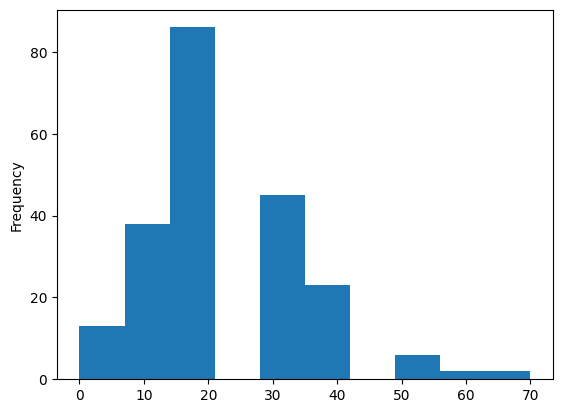

In [ ]:
subset6['Age'].plot(kind='hist')

Fare과 Pclass

<Axes: xlabel='Pclass', ylabel='Fare'>

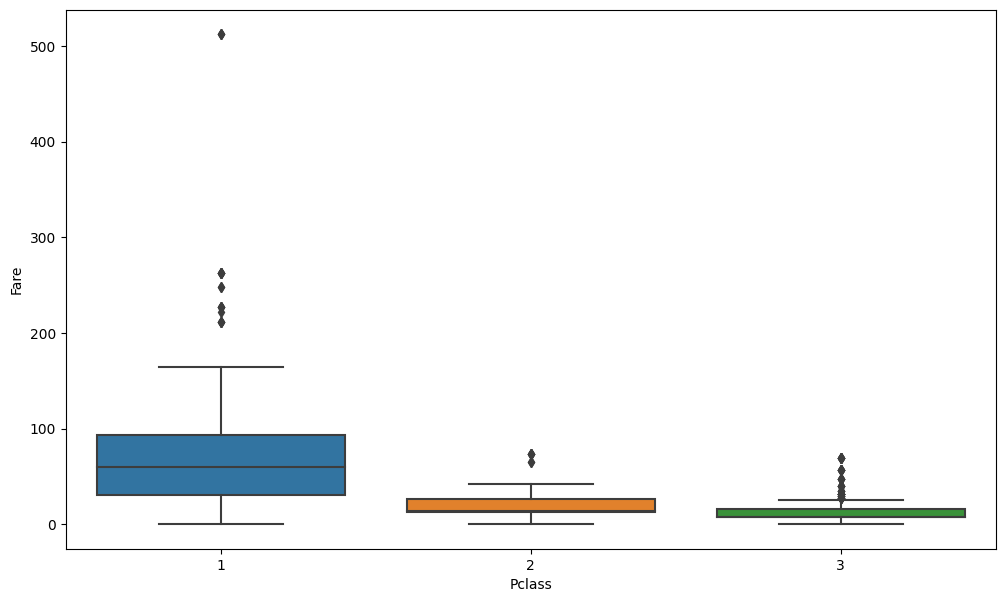

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Fare',data=train)

첫번쨰 바플랏에 하나 이상함 겁나큼

class1이 가장 비싼티켓임을 알 수 있다.

**Sibsb + Parch = Family**

In [ ]:
train['Family'] = train['SibSp'] + train['Parch']

<Axes: xlabel='Family', ylabel='Survived'>

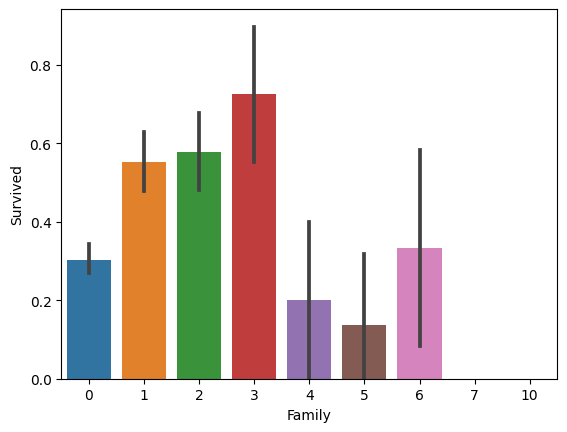

In [ ]:
#가족 수에 따른 생존여부
sns.barplot(x='Family',y='Survived' ,data=train)

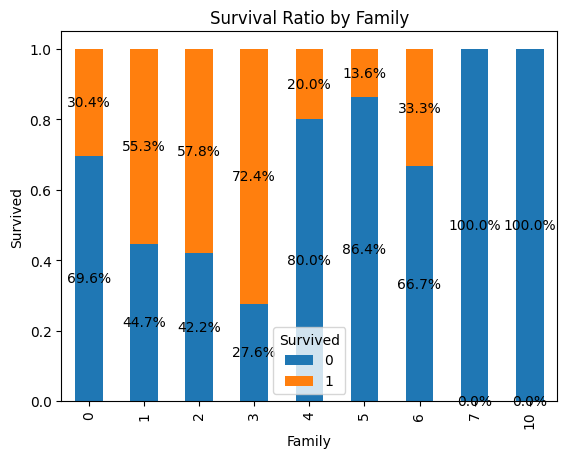

In [ ]:
myfn(train,'Family','Survived')

혼자탓거나, 가족수가 4명이상이면 거의 사망